In [1]:
from huggingface_hub import login

# REPLACE THE TEXT INSIDE THE QUOTES WITH YOUR TOKEN
login("key")

In [2]:
from transformers import pipeline

# 1. Initialize the summarization pipeline
# This downloads the 'sshleifer/distilbart-cnn-12-6' model automatically
summarizer = pipeline("summarization")

# 2. Define your text
text = """
America has changed dramatically during recent years. Not only has the number of
graduates in traditional engineering disciplines such as mechanical, civil,
electrical, chemical, and aeronautical engineering declined, but in most of
the premier American universities engineering curricula now concentrate on
and encourage largely the study of engineering science. As a result, there
are declining offerings in engineering subjects dealing with infrastructure,
the environment, and related issues, and greater concentration on high
technology subjects, largely supporting increasingly complex scientific
developments. While the latter is important, it should not be at the expense
of more traditional engineering.

Rapidly developing economies such as China and India, as well as other
industrial countries in Europe and Asia, continue to encourage and advance
the teaching of engineering. Both China and India, respectively, graduate
six and eight times as many traditional engineers as does the United States.
Other industrial countries at minimum maintain their output, while America
suffers an increasingly serious decline in the number of engineering graduates
and a lack of well-educated engineers.
"""

summary = summarizer(text, min_length=20, max_length=100)

# 4. Print the result
print("Original Length:", len(text))
print("Summary:", summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


Original Length: 1205
Summary:  The number of engineering graduates in the United States has declined in recent years . China and India graduate six and eight times as many traditional engineers as the U.S. The U.N. has an increasingly serious decline in engineering graduates .


In [3]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import sentence_transformers
sentences = [
    "Three years later, the coffin was still full of Jello.",
    "The fish dreamed of escaping the fishbowl and into the toilet where he saw his friend go.",
    "The person box was packed with jelly many dozens of months later.",
    "He found a leprechaun in his walnut shell."
]
model = SentenceTransformer('bert-base-nli-mean-tokens')
sentence_embeddings = model.encode(sentences)
cosine_similarity(
    [sentence_embeddings[0]],
    sentence_embeddings[1:]
)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

array([[0.3308891, 0.7219258, 0.5548363]], dtype=float32)

In [4]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
clf = pipeline("sentiment-analysis",
               model="distilbert-base-uncased-finetuned-sst-2-english",
               tokenizer=tokenizer)
data = ["I am happy to be reading this article",
        "I am not happy to read this article",
        "This is a really informative article",
        "Thank you for reading",
        "feel sad today",
        "Umm, not sure but thank you for reading",
        "I found this 50% interesting and 50% uninteresting"]

# classifying each instance
results = clf(data)

for result in results:
    print(f"label: {result['label']}, score: {round(result['score'], 4)}")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Device set to use cpu


label: POSITIVE, score: 0.9999
label: NEGATIVE, score: 0.9989
label: POSITIVE, score: 0.9998
label: POSITIVE, score: 0.9998
label: NEGATIVE, score: 0.9975
label: POSITIVE, score: 0.9996
label: NEGATIVE, score: 0.6725


In [5]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups(subset='all')['data']

In [6]:
data = data[:2000]
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Create a huggingFace transformer pipeline
model = pipeline("sentiment-analysis",
               model="distilbert-base-uncased-finetuned-sst-2-english",
               tokenizer=tokenizer)
tokenizer = AutoTokenizer.from_pretrained('distilroberta-base')
encoded_seq = tokenizer.encode("i am sentence")
print(encoded_seq)

Device set to use cpu


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[0, 118, 524, 3645, 2]


In [8]:
data[0]

"From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [9]:
embeddings = []
for temp in data:
    embeddings.append(tokenizer.encode(temp))

Token indices sequence length is longer than the specified maximum sequence length for this model (1220 > 512). Running this sequence through the model will result in indexing errors


In [11]:
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


Generating Embeddings...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Running UMAP...
Running HDBSCAN...
Plotting...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


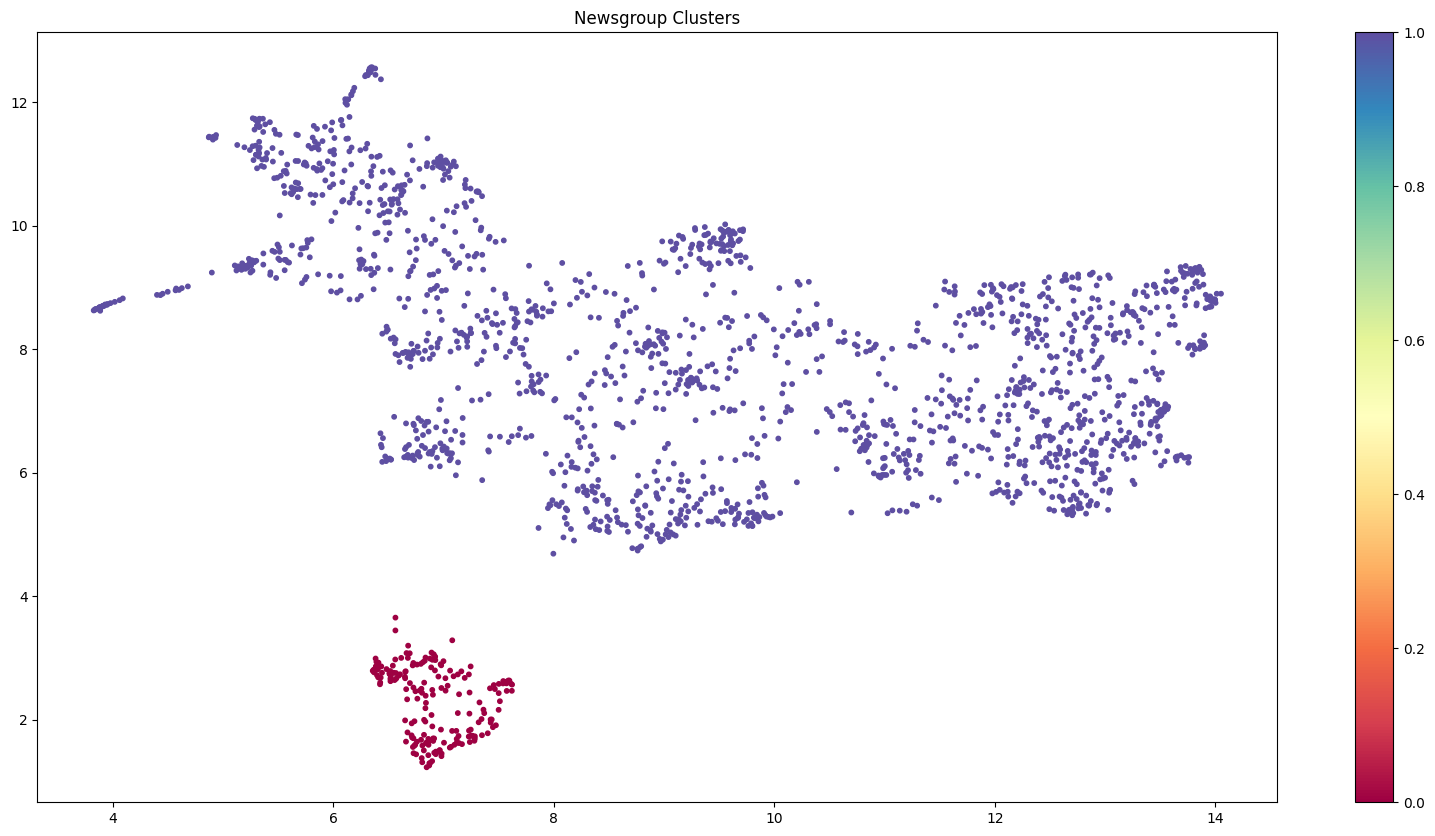

In [14]:
print("Generating Embeddings...")
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(data, show_progress_bar=True)

# 3. Reduce Dimensions with UMAP
# Now we feed vectors (shape: 2000, 384) into UMAP, not ragged lists of integers
print("Running UMAP...")
umap_embeddings = umap.UMAP(n_neighbors=15,
                            n_components=2,
                            min_dist=0.1,
                            metric='cosine').fit_transform(embeddings)

# 4. Cluster with HDBSCAN
print("Running HDBSCAN...")
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',
                          cluster_selection_method='eom').fit(umap_embeddings)

# 5. Visualize
print("Plotting...")
result = pd.DataFrame(umap_embeddings, columns=['x', 'y'])
result['labels'] = cluster.labels_

fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]

# Plot outliers in grey, clusters in color
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=10, label='Noise')
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=10, cmap='Spectral')
plt.title("Newsgroup Clusters")
plt.colorbar()
plt.show()